In [21]:
import pandas as pd
import numpy as np
from datetime import datetime
from datetime import date
import matplotlib.pyplot as plt

FILE = "results.csv"

df = pd.read_csv(FILE)
df = df.dropna()

print(df.columns)

tuples = df.groupby(list(df.columns)).size()
count = 0
for t in tuples.values:
    if (t>1):
        count+=t
print("The number of tuples in %s are: "%FILE, count)
print("The number of unique tournament entries is: ", len(df.groupby('tournament').size()))

df['date'] = df['date'].apply(lambda d: datetime.strptime(d, "%Y-%m-%d").date())

start_2018 = date(2018,1,1)
end_2018 = date(2018,12,31)
matches_2018 = df[(df['date'] >= start_2018) & (df['date'] <= end_2018)]
print("The number of matches that occurred in 2018 is: ", len(matches_2018))

Index(['date', 'home_team', 'away_team', 'home_score', 'away_score',
       'tournament', 'city', 'country', 'neutral'],
      dtype='object')
The number of tuples in results.csv are:  0
The number of unique tournament entries is:  120
The number of matches that occurred in 2018 is:  908


The number of home team wins is:  20739
The number of home team draws is:  9837
The number of home team losses is:  12074


Text(0.5, 1.0, 'Home Team Games')

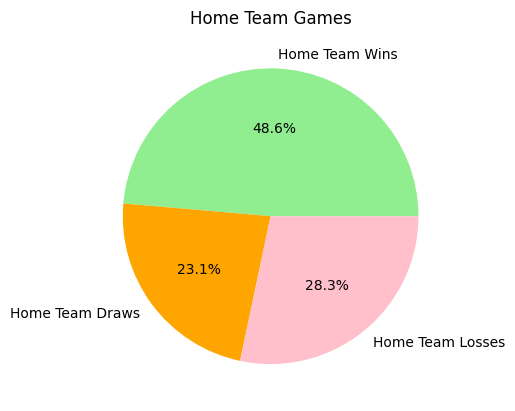

In [48]:
num_home_wins = len(df[df['home_score'] > df['away_score']])
print("The number of home team wins is: ", num_home_wins)

num_home_draws = len(df[df['home_score'] == df['away_score']])
print("The number of home team draws is: ", num_home_draws)

num_home_losses = len(df[df['home_score'] < df['away_score']])
print("The number of home team losses is: ", num_home_losses)

home_games = [num_home_wins, num_home_draws, num_home_losses]
labels = ["Home Team Wins", "Home Team Draws", "Home Team Losses"]

fig1, ax1 = plt.subplots()
ax1.pie(home_games, labels=labels, colors=['lightgreen', 'orange', 'pink'], autopct='%1.1f%%')
plt.title("Home Team Games")

<Axes: title={'center': 'Game Field Neutral'}>

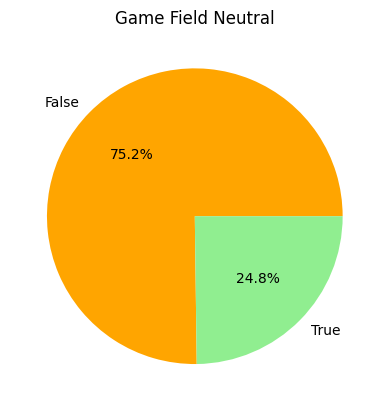

In [54]:
df.groupby('neutral').size().plot(kind='pie', title="Game Field Neutral", colors=['orange', 'lightgreen'], autopct='%1.1f%%')